In [45]:
import pandas as pd
from pymatgen.core import Composition
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
import json

with open('datasets/steels_yield.json') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(**data)
df

,composition,yield strength
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,2411.5
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,1123.1
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,1736.3
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,2487.3
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,2249.6
...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,1722.5
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,1019.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,1860.3
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,1812.1


In [4]:
comps: list[Composition] = [Composition(x) for x in df['composition']]
comps[0]

Composition('Fe0.62 C0.000953 Mn0.000521 Si0.00102 Cr0.00011 Ni0.192 Mo0.0176 V0.000112 Nb6.16e-05 Co0.146 Al0.00318 Ti0.0185')

<Axes: ylabel='Frequency'>

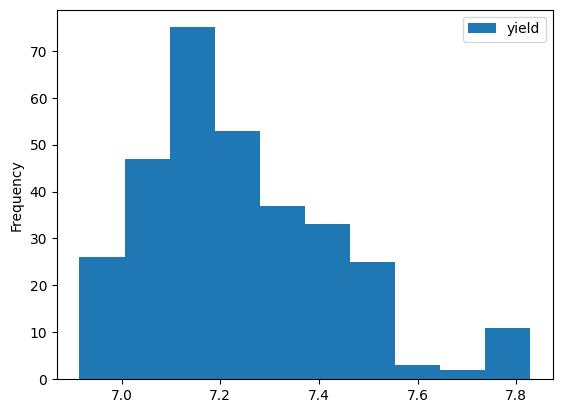

In [5]:
elems = list({c.symbol for c in set.union(*[set(c.elements) for c in comps])})

fracs = []

for comp in comps:
    base = {e: 0 for e in elems}
    base.update(comp.get_el_amt_dict())
    fracs.append(base)

fdf = pd.DataFrame(fracs)
fdf['yield'] = df['yield strength']
fdf['yield'] = np.log(df['yield strength'] + 1)
fdf[['yield']].plot.hist()

In [6]:
fdf.to_feather('datasets/steels_raw.feather')

In [75]:
import matminer

from matminer.featurizers.base import MultipleFeaturizer
import matminer.featurizers.composition as cf

feats = MultipleFeaturizer([
    cf.ElementProperty.from_preset('megnet_el'),
    cf.WenAlloys()
])

feats

/home/nicholas/anaconda3/lib/python3.11/site-packages/matminer/utils/data.py:281: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mixing_dataset = pd.read_csv(
/home/nicholas/anaconda3/lib/python3.11/site-packages/matminer/utils/data.py:281: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mixing_dataset = pd.read_csv(


MultipleFeaturizer(featurizers=[ElementProperty(data_source=<matminer.utils.data.MEGNetElementData object at 0x752fefcabc10>,
                                                features=['embedding 1',
                                                          'embedding 2',
                                                          'embedding 3',
                                                          'embedding 4',
                                                          'embedding 5',
                                                          'embedding 6',
                                                          'embedding 7',
                                                          'embedding 8',
                                                          'embedding 9',
                                                          'embedding 10',
                                                          'embedding 11',
                                                          'embedding 12',
                                                          'embedding 13',
                                                          'embedding 14',
                                                          'embedding 15',
                                                          'embedding 16'],
                                                stats=['minimum', 'maximum',
                                                       'range', 'mean',
                                                       'std_dev']),
                                WenAlloys()])

In [76]:
feat_df = pd.DataFrame(feats.transform(comps), columns=feats.feature_labels()).select_dtypes('number')
feat_df

,MEGNetElementData minimum embedding 1,MEGNetElementData maximum embedding 1,MEGNetElementData range embedding 1,MEGNetElementData mean embedding 1,MEGNetElementData std_dev embedding 1,MEGNetElementData minimum embedding 2,MEGNetElementData maximum embedding 2,MEGNetElementData range embedding 2,MEGNetElementData mean embedding 2,MEGNetElementData std_dev embedding 2,...,Mean cohesive energy,Interant electrons,Interant s electrons,Interant p electrons,Interant d electrons,Interant f electrons,Shear modulus mean,Shear modulus delta,Shear modulus local mismatch,Shear modulus strength model
0,-0.185048,0.449135,0.634183,0.230886,0.202014,-0.624651,0.744485,1.369136,0.346103,0.240558,...,4.382084,53.0,3.0,5.0,45.0,0,79.486001,0.179415,3.192861,-0.009637
1,-0.185048,0.611494,0.796542,0.141125,0.240714,-0.624651,0.744485,1.369136,0.439068,0.143552,...,4.385516,58.0,3.0,8.0,47.0,0,89.654760,0.412408,9.423732,-0.037209
2,-0.185048,0.449135,0.634183,0.177554,0.237760,-0.624651,0.548863,1.173514,0.387494,0.232515,...,4.307342,51.0,3.0,3.0,45.0,0,82.726349,0.155707,4.943530,-0.012341
3,-0.185048,0.449135,0.634183,0.225180,0.200331,-0.624651,0.744485,1.369136,0.352068,0.237282,...,4.392998,53.0,3.0,5.0,45.0,0,79.701604,0.149983,3.122856,-0.008282
4,-0.185048,0.449135,0.634183,0.228480,0.204576,-0.624651,0.744485,1.369136,0.351978,0.239216,...,4.357222,53.0,3.0,5.0,45.0,0,79.065182,0.140656,2.679143,-0.007210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-0.185048,0.449135,0.634183,0.121148,0.205593,-0.624651,0.744485,1.369136,0.454409,0.169784,...,4.389137,51.0,3.0,5.0,43.0,0,90.860777,0.545643,10.051623,-0.053708
308,-0.185048,0.449135,0.634183,0.142069,0.224168,-0.624651,0.548863,1.173514,0.418340,0.249387,...,4.333535,51.0,3.0,3.0,45.0,0,83.373250,0.118826,3.126767,-0.006261
309,-0.185048,0.449135,0.634183,0.127984,0.190391,-0.624651,0.744485,1.369136,0.445651,0.189240,...,4.443455,51.0,3.0,5.0,43.0,0,90.180590,0.548117,10.002169,-0.054859
310,-0.185048,0.449135,0.634183,0.109220,0.184625,-0.624651,0.744485,1.369136,0.455812,0.200356,...,4.419634,51.0,3.0,5.0,43.0,0,91.993679,0.559673,10.593241,-0.056013


In [77]:
cv = (feat_df.std() / (feat_df.abs().mean() + 1e-12))

feat_df = feat_df.loc[:, cv.index[cv > 0.1]]

(feat_df.std() / (feat_df.abs().mean() + 1e-12)).sort_values()

MEGNetElementData maximum embedding 10    0.103681
MEGNetElementData minimum embedding 4     0.107141
MEGNetElementData minimum embedding 9     0.112502
MEGNetElementData std_dev embedding 5     0.113412
MEGNetElementData range embedding 13      0.117010
MEGNetElementData maximum embedding 1     0.118887
MEGNetElementData std_dev embedding 7     0.120017
MEGNetElementData minimum embedding 7     0.120283
MEGNetElementData minimum embedding 14    0.123935
MEGNetElementData std_dev embedding 4     0.124253
Electronegativity local mismatch          0.124455
MEGNetElementData range embedding 16      0.124920
MEGNetElementData mean embedding 7        0.133721
MEGNetElementData std_dev embedding 8     0.133741
Electronegativity delta                   0.136928
MEGNetElementData range embedding 11      0.138320
MEGNetElementData minimum embedding 16    0.138742
MEGNetElementData range embedding 6       0.140828
MEGNetElementData range embedding 7       0.143003
Configuration entropy          

In [78]:
feat_df = (feat_df - feat_df.mean()) / feat_df.std()
feat_df['yield'] = df['yield strength']
feat_df
feat_df.to_feather('datasets/steels_featurized.feather')

In [79]:
feat_df

,MEGNetElementData maximum embedding 1,MEGNetElementData mean embedding 1,MEGNetElementData std_dev embedding 2,MEGNetElementData minimum embedding 4,MEGNetElementData mean embedding 4,MEGNetElementData std_dev embedding 4,MEGNetElementData maximum embedding 5,MEGNetElementData std_dev embedding 5,MEGNetElementData minimum embedding 6,MEGNetElementData maximum embedding 6,...,Configuration entropy,Lambda entropy,Electronegativity delta,Electronegativity local mismatch,Mixing enthalpy,Interant p electrons,Shear modulus delta,Shear modulus local mismatch,Shear modulus strength model,yield
0,-0.399173,2.430671,0.164436,-0.298575,-2.912727,0.972689,-0.385847,1.034984,0.287028,0.771258,...,-1.433448,-0.843212,1.211937,1.701960,0.151556,-0.202927,-0.826240,-1.200074,0.994359,2411.5
1,2.497151,-0.139836,-1.423629,-0.298575,-0.518667,-0.289176,2.471980,0.186523,-2.397567,-1.274293,...,-1.506768,0.850235,1.079520,1.671074,0.336202,2.263817,0.985429,1.351760,-1.039029,1123.1
2,-0.399173,0.903388,0.032755,3.372448,-1.376874,0.234144,-0.385847,0.120682,1.322421,0.771258,...,-1.981122,-3.176098,0.162312,1.577936,-0.421300,-1.847422,-1.010586,-0.483093,0.794937,1736.3
3,-0.399173,2.267271,0.110795,-0.298575,-2.692903,0.958364,-0.385847,1.198441,0.287028,0.771258,...,-1.351244,-0.907915,0.979480,1.407089,0.009992,-0.202927,-1.055088,-1.228744,1.094258,2487.3
4,-0.399173,2.361787,0.142461,-0.298575,-2.684406,1.028013,-0.385847,0.957056,0.287028,0.771258,...,-1.061765,-1.534330,0.984106,1.243837,-0.003587,-0.202927,-1.127611,-1.410465,1.173313,2249.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-0.399173,-0.711908,-0.994187,-0.298575,1.089302,-0.118605,-0.385847,-0.528483,0.287028,-1.274293,...,1.266461,1.385400,1.363354,-0.636218,0.707823,-0.202927,2.021412,1.608910,-2.255811,1722.5
308,-0.399173,-0.112789,0.308970,3.372448,0.704381,0.469133,-0.385847,0.164624,1.322421,0.771258,...,1.817447,-1.591550,-2.304028,-2.665622,-1.325235,-1.847422,-1.297356,-1.227142,1.243298,1019.0
309,-0.399173,-0.516140,-0.675688,-0.298575,0.831891,0.303815,-0.385847,0.908138,0.287028,-1.274293,...,1.066289,1.397266,1.715681,-0.289838,0.938281,-0.202927,2.040649,1.588657,-2.340706,1860.3
310,-0.399173,-1.053489,-0.493710,-0.298575,1.488956,-0.165179,-0.385847,-0.763893,0.287028,-1.274293,...,2.322380,1.504984,1.539353,-1.040045,0.820536,-0.202927,2.130505,1.830729,-2.425860,1812.1
